In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="bigllama/mistralv01-7b")

chain = prompt | model

chain.invoke({"question": "What is LangChain?"})

' Sure, I can help with that! Here are some steps we can follow to understand what LangChain is:\n\n1. First, let\'s define "lang". In the context of programming languages and language models, a "lang" typically refers to a specific programming language or language model architecture. For example, we might talk about Python, Java, C++, or TensorFlow for natural language processing (NLP).\n2. Next, let\'s consider the concept of "chain". In programming, a chain is often used to refer to a sequence of operations that are executed in a specific order. For example, you might have a "chain" of data processing steps that involve reading data from a file, cleaning and transforming the data, and then writing it to another file.\n3. Combining these concepts, we can start to think about LangChain as a way of organizing and executing a sequence of operations in a specific order. In other words, LangChain might be a framework or toolset for building and managing language models that are designed t


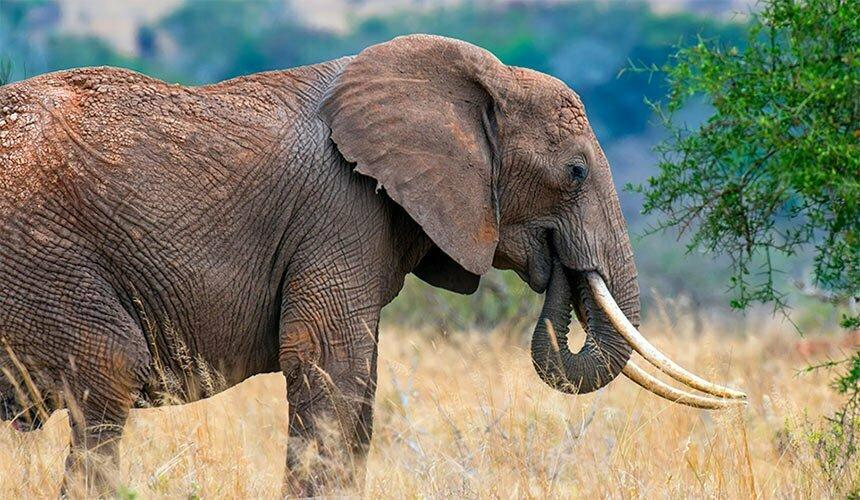

In [30]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed

    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "/Users/tiyasamukherjee/Desktop/Projects/Generative_AI_Projects/ollama_langchain/example3.jpg"
pil_image = Image.open(file_path).convert("RGB")
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [31]:
from langchain_ollama import OllamaLLM

llm = OllamaLLM(model="bakllava")

llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("Describe the image in poetic language.")

'\nA large, brown elephant stands proudly in a dry grass field, with its ears fanned out and tusks gleaming white. The sky serves as a backdrop to this magnificent creature. A nearby tree offers shade from the sun, hinting at the hot climate in which this scene takes place. The image evokes feelings of peacefulness and harmony, as the elephant gracefully inhabits its natural environment.'

In [32]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_community.llms import Ollama

# model = OllamaLLM(model="bigllama/mistralv01-7b")

llm = Ollama(
    model="bigllama/mistralv01-7b", callback_manager=CallbackManager([StreamingStdOutCallbackHandler()])
)

llm.invoke("Tell me a joke")

# llm("The first man on the summit of Mount Everest, the highest peak on Earth, was ...")

/var/folders/gy/x8wk0p_j23qf0z38p48fjcgm0000gn/T/ipykernel_34881/2543659051.py:7: DeprecationWarning: callback_manager is deprecated. Please use callbacks instead.
  llm = Ollama(


 Why don't scientists trust atoms? Because they make up everything!

" Why don't scientists trust atoms? Because they make up everything!"